In [4]:
import pandas as pd 

In [5]:
df = pd.read_csv("../prep_data/hotelid1_daily_merged.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46084 entries, 0 to 46083
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           46084 non-null  int64  
 1   datum_dolaska        46084 non-null  object 
 2   datum_odjave         46084 non-null  object 
 3   kanal_prodaje_id     46084 non-null  int64  
 4   tip_sobe_id          46084 non-null  int64  
 5   cijena_nocenja       46084 non-null  float64
 6   rezervacija_id       46084 non-null  int64  
 7   gost_id              46084 non-null  int64  
 8   zemlja_gosta_mapped  46084 non-null  int64  
 9   total_occupancy      46084 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 3.5+ MB


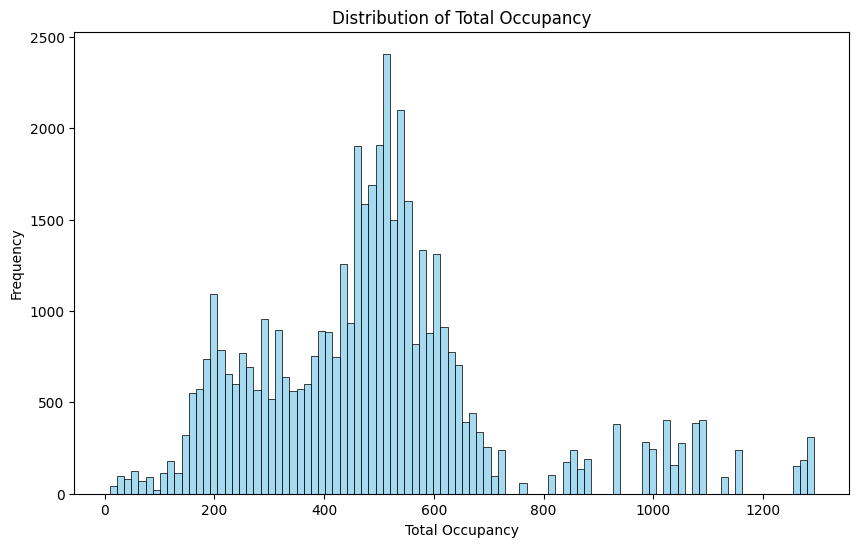

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['total_occupancy'], color='skyblue')
plt.title('Distribution of Total Occupancy')
plt.xlabel('Total Occupancy')
plt.ylabel('Frequency')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = df[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja', 'gost_id', 'zemlja_gosta_mapped', 'rezervacija_id']]
y = df['total_occupancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(results_df)

Mean Absolute Error: 159.56686900788884


In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,  r2_score, mean_absolute_error
import statsmodels.api as sm

split_percentage = 0.8

train_data, test_data = train_test_split(df, test_size=(1 - split_percentage), shuffle=False)

X_train_gb = train_data[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja','rezervacija_id']]
y_train_gb = train_data['total_occupancy']
X_test_gb = test_data[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja','rezervacija_id']]
y_test_gb = test_data['total_occupancy']

# X_train_arima = train_data.set_index('datum_dolaska')['total_occupancy']
# X_test_arima = test_data.set_index('datum_dolaska')['total_occupancy']

gb_model = GradientBoostingRegressor(random_state=27)
gb_model.fit(X_train_gb, y_train_gb)
y_pred_gb = gb_model.predict(X_test_gb)

# arima_model = sm.tsa.ARIMA(X_train_arima, order=(1, 1, 1))
# arima_result = arima_model.fit()
# y_pred_arima = arima_result.forecast(steps=len(X_test_arima))


results_df_gb = pd.DataFrame({'Actual': y_test_gb, 'Predicted (Gradient Boosting)': y_pred_gb})
#results_df_arima = pd.DataFrame({'Actual': X_test_arima.reset_index(drop=True), 'Predicted (ARIMA)': y_pred_arima})

# print(results_df_gb)
# print(results_df_arima)

In [10]:
import numpy as np 
mae_gb = mean_absolute_error(results_df_gb['Actual'], results_df_gb['Predicted (Gradient Boosting)'])
mse_gb = mean_squared_error(results_df_gb['Actual'], results_df_gb['Predicted (Gradient Boosting)'])
rmse_gb = np.sqrt(mse_gb)

print(f'Mean Absolute Error (GB): {mae_gb}')
print(f'Mean Squared Error (GB): {mse_gb}')
print(f'Root Mean Squared Error (GB): {rmse_gb}')

Mean Absolute Error (GB): 122.10130010051085
Mean Squared Error (GB): 21317.137982203192
Root Mean Squared Error (GB): 146.00389714731313


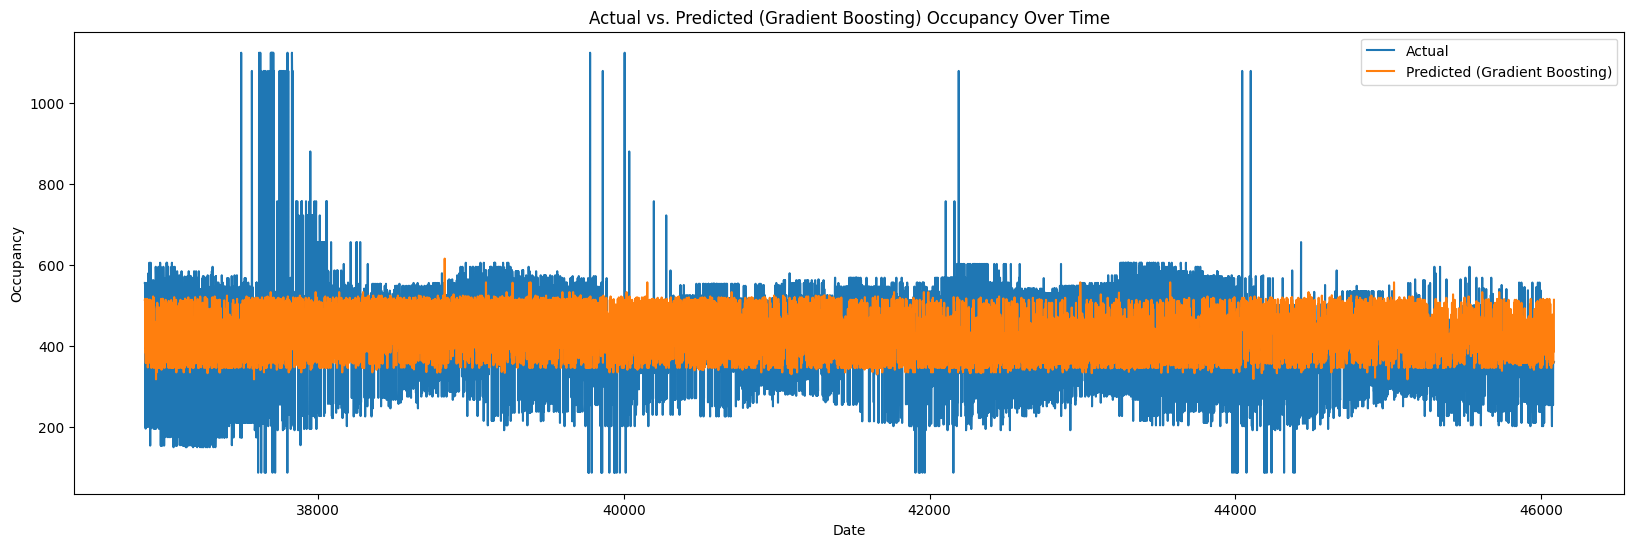

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(results_df_gb.index, results_df_gb['Actual'], label='Actual')
plt.plot(results_df_gb.index, results_df_gb['Predicted (Gradient Boosting)'], label='Predicted (Gradient Boosting)')
plt.title('Actual vs. Predicted (Gradient Boosting) Occupancy Over Time')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(results_df_arima.index, results_df_arima['Actual'], label='Actual')
# plt.plot(results_df_arima.index, results_df_arima['Predicted (ARIMA)'], label='Predicted (ARIMA)')
# plt.title('Actual vs. Predicted (ARIMA) Occupancy Over Time')
# plt.xlabel('Date')
# plt.ylabel('Occupancy')
# plt.legend()
# plt.show()

In [12]:
from sklearn.ensemble import RandomForestRegressor


X_train_rf = train_data[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja', 'rezervacija_id']]
y_train_rf = train_data['total_occupancy']
X_test_rf = test_data[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja','rezervacija_id']]
y_test_rf = test_data['total_occupancy']


rf_model = RandomForestRegressor(random_state=27)
rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_model.predict(X_test_rf)

mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print(f'Mean Absolute Error (RF): {mae_rf}')
print(f'Mean Squared Error (RF): {mse_rf}')
print(f'Root Mean Squared Error (RF): {rmse_rf}')
print(f'R2 (RF): {r2_rf}')

Mean Absolute Error (RF): 130.0316762504069
Mean Squared Error (RF): 25949.565152262123
Root Mean Squared Error (RF): 161.08868722620505
R2 (RF): -0.5751741678896465


In [13]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_train_svr = train_data[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja']]
y_train_svr = train_data['total_occupancy']
X_test_svr = test_data[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja']]
y_test_svr = test_data['total_occupancy']

#SVR model se pravi putem pajplajna
svr_model = make_pipeline(StandardScaler(), SVR())
svr_model.fit(X_train_svr, y_train_svr)
y_pred_svr = svr_model.predict(X_test_svr)

mae_svr = mean_absolute_error(y_test_svr, y_pred_svr)
mse_svr = mean_squared_error(y_test_svr, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

print(f'Mean Absolute Error (SVR): {mae_svr}')
print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'Root Mean Squared Error (SVR): {rmse_svr}')

Mean Absolute Error (SVR): 145.17545548540502
Mean Squared Error (SVR): 34552.84098597481
Root Mean Squared Error (SVR): 185.8839449387031


SVR je za sad najbolji model ali mu treba najduze da se izvrsi

Mean Absolute Error (ElasticNet): 159.5675800691865
Mean Squared Error (ElasticNet): 47602.0935432817
Root Mean Squared Error (ElasticNet): 218.17904010990995


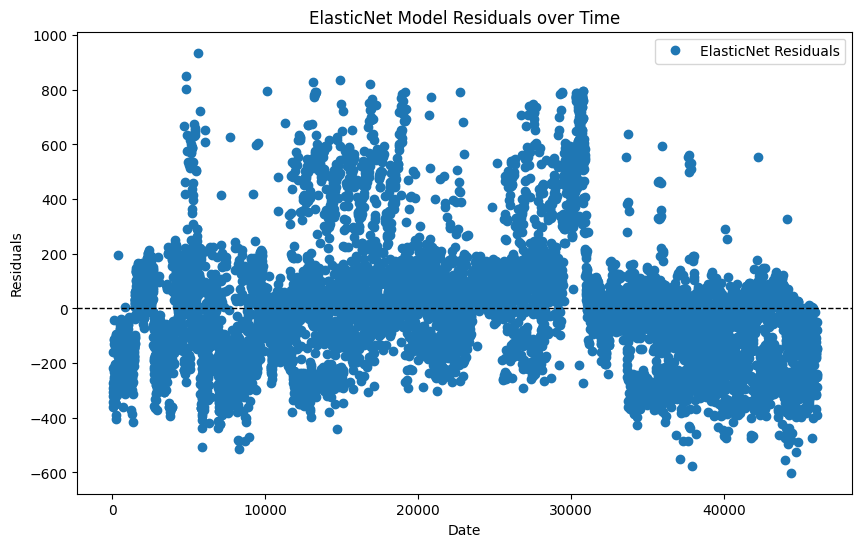

In [14]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=1)  # You can adjust alpha and l1_ratio as needed

elasticnet_model.fit(X_train, y_train)

y_pred_elasticnet = elasticnet_model.predict(X_test)

mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)
# Print the errors
print(f'Mean Absolute Error (ElasticNet): {mae_elasticnet}')
print(f'Mean Squared Error (ElasticNet): {mse_elasticnet}')
print(f'Root Mean Squared Error (ElasticNet): {rmse_elasticnet}')

residuals_elasticnet = y_test - y_pred_elasticnet

plt.figure(figsize=(10, 6))
plt.plot(X_test.index, residuals_elasticnet, label='ElasticNet Residuals', marker='o', linestyle='None')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('ElasticNet Model Residuals over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

actual_values = y_test  
predicted_values_gb = gb_model.predict(X_test_gb)
predicted_values_rf = rf_model.predict(X_test_rf)
predicted_values_svr = svr_model.predict(X_test_svr)
predicted_values_elasticnet = elasticnet_model.predict(X_test)
predicted_values_linear = linear_model.predict(X_test)

results_df = pd.DataFrame(index=['MAE', 'MSE', 'R-squared'])

metrics_gb = [mean_absolute_error(y_test_gb, predicted_values_gb),
              mean_squared_error(y_test_gb, predicted_values_gb),
              r2_score(y_test_gb, predicted_values_gb)]
results_df['Gradient Boosting'] = metrics_gb

metrics_rf = [mean_absolute_error(y_test_rf, predicted_values_rf),
              mean_squared_error(y_test_rf, predicted_values_rf),
              r2_score(y_test_rf, predicted_values_rf)]
results_df['Random Forest'] = metrics_rf

metrics_svr = [mean_absolute_error(y_test_svr, predicted_values_svr),
               mean_squared_error(y_test_svr, predicted_values_svr),
               r2_score(y_test_svr, predicted_values_svr)]
results_df['SVR'] = metrics_svr

metrics_elasticnet = [mean_absolute_error(actual_values, predicted_values_elasticnet),
                      mean_squared_error(actual_values, predicted_values_elasticnet),
                      r2_score(actual_values, predicted_values_elasticnet)]
results_df['ElasticNet'] = metrics_elasticnet

metrics_linear = [mean_absolute_error(actual_values, predicted_values_linear),
                  mean_squared_error(actual_values, predicted_values_linear),
                  r2_score(actual_values, predicted_values_linear)]
results_df['Linear Regression'] = metrics_linear

print(results_df)

           Gradient Boosting  Random Forest           SVR    ElasticNet  \
MAE               122.101300     130.031676    145.175455    159.567580   
MSE             21317.137982   25949.565152  34552.840986  47602.093543   
R-squared          -0.293979      -0.575174     -1.097405      0.102856   

           Linear Regression  
MAE               159.566869  
MSE             47600.023733  
R-squared           0.102895  


A sad sa hotelid=0

In [18]:
df = pd.read_csv("../prep_data/hotelid1_daily_merged.csv")

C:\Users\vojislav\AppData\Local\Temp\ipykernel_19904\3626383640.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


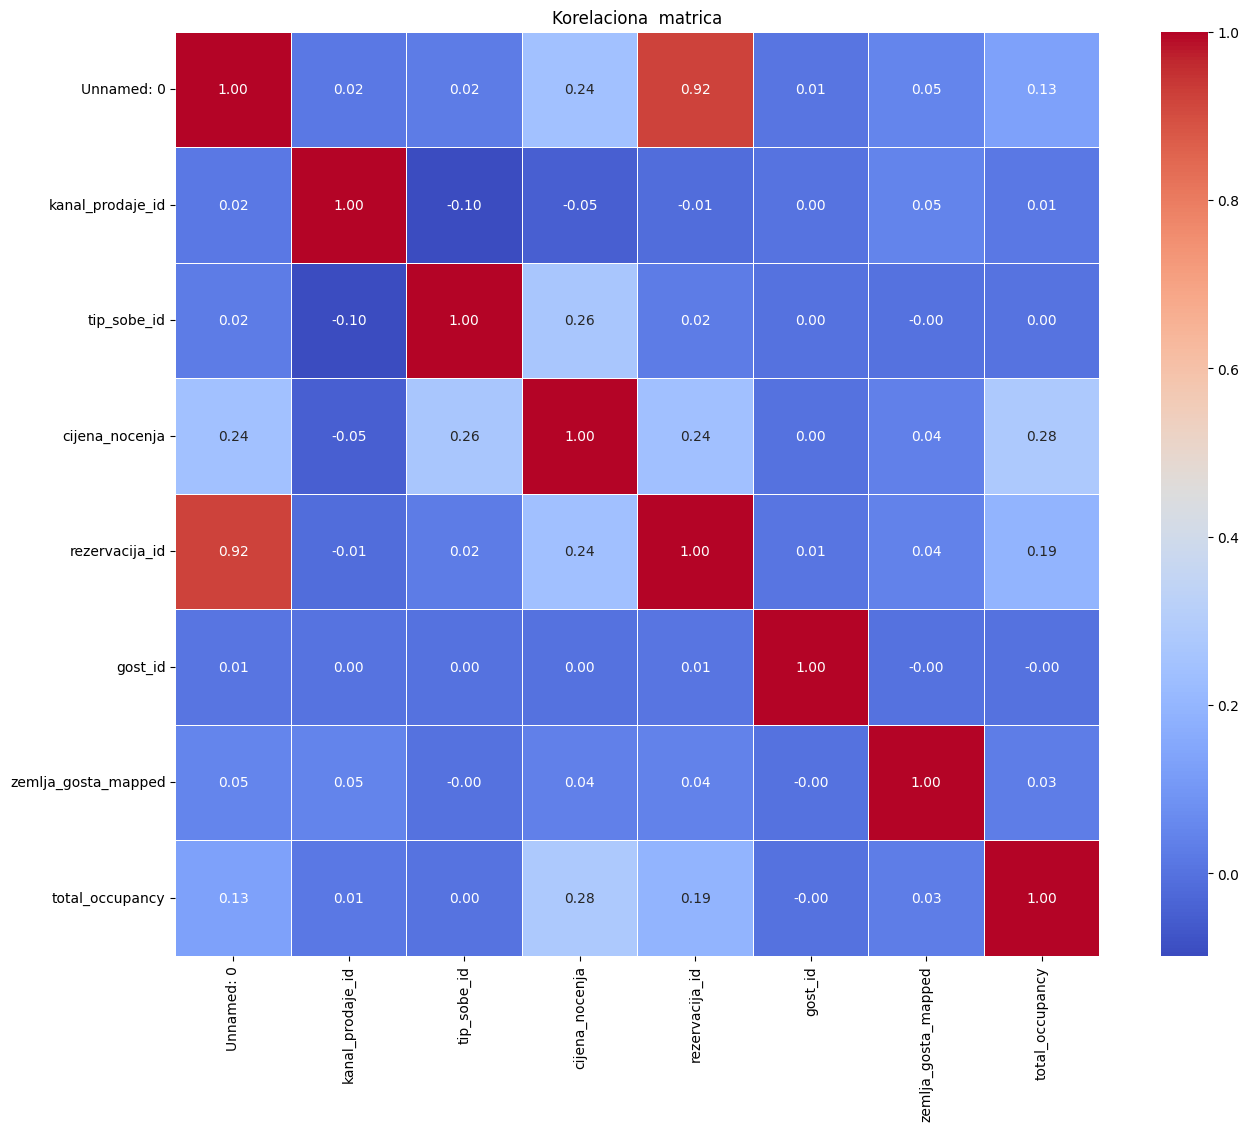

In [19]:
corr = df.corr()
plt.figure(figsize=(16,12))

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)

plt.title("Korelaciona  matrica")
plt.show()

In [20]:
X = df[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja', 'gost_id', 'zemlja_gosta_mapped','rezervacija_id']]
y = df['total_occupancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 159.56686900788884


In [21]:
split_percentage = 0.8

train_data, test_data = train_test_split(df, test_size=(1 - split_percentage), shuffle=True)

X_train_gb = train_data[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja', 'rezervacija_id']]
y_train_gb = train_data['total_occupancy']
X_test_gb = test_data[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja','rezervacija_id']]
y_test_gb = test_data['total_occupancy']

# X_train_arima = train_data.set_index('datum_dolaska')['total_occupancy']
# X_test_arima = test_data.set_index('datum_dolaska')['total_occupancy']

gb_model = GradientBoostingRegressor(random_state=27)
gb_model.fit(X_train_gb, y_train_gb)
y_pred_gb = gb_model.predict(X_test_gb)

# arima_model = sm.tsa.ARIMA(X_train_arima, order=(1, 1, 1))
# arima_result = arima_model.fit()
# y_pred_arima = arima_result.forecast(steps=len(X_test_arima))


results_df_gb = pd.DataFrame({'Actual': y_test_gb, 'Predicted (Gradient Boosting)': y_pred_gb})

mae_gb = mean_absolute_error(results_df_gb['Actual'], results_df_gb['Predicted (Gradient Boosting)'])
mse_gb = mean_squared_error(results_df_gb['Actual'], results_df_gb['Predicted (Gradient Boosting)'])
rmse_gb = np.sqrt(mse_gb)

print(f'Mean Absolute Error (GB): {mae_gb}')
print(f'Mean Squared Error (GB): {mse_gb}')
print(f'Root Mean Squared Error (GB): {rmse_gb}')

Mean Absolute Error (GB): 108.54167933384471
Mean Squared Error (GB): 22923.847994556156
Root Mean Squared Error (GB): 151.40623499234155


In [22]:
X_train_rf = train_data[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja','rezervacija_id']]
y_train_rf = train_data['total_occupancy']
X_test_rf = test_data[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja','rezervacija_id']]
y_test_rf = test_data['total_occupancy']


rf_model = RandomForestRegressor(random_state=27)
rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_model.predict(X_test_rf)

mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'Mean Absolute Error (RF): {mae_rf}')
print(f'Mean Squared Error (RF): {mse_rf}')
print(f'Root Mean Squared Error (RF): {rmse_rf}')

Mean Absolute Error (RF): 96.10009547575133
Mean Squared Error (RF): 21956.620075165454
Root Mean Squared Error (RF): 148.17766388752878


In [23]:
X_train_svr = train_data[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja','rezervacija_id']]
y_train_svr = train_data['total_occupancy']
X_test_svr = test_data[['kanal_prodaje_id', 'tip_sobe_id', 'cijena_nocenja','rezervacija_id']]
y_test_svr = test_data['total_occupancy']

svr_model = make_pipeline(StandardScaler(), SVR())
svr_model.fit(X_train_svr, y_train_svr)
y_pred_svr = svr_model.predict(X_test_svr)

mae_svr = mean_absolute_error(y_test_svr, y_pred_svr)
mse_svr = mean_squared_error(y_test_svr, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

print(f'Mean Absolute Error (SVR): {mae_svr}')
print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'Root Mean Squared Error (SVR): {rmse_svr}')

Mean Absolute Error (SVR): 142.49641915539723
Mean Squared Error (SVR): 41296.5409702224
Root Mean Squared Error (SVR): 203.21550376440868


Mean Absolute Error (ElasticNet): 159.56814397880805
Mean Squared Error (ElasticNet): 47609.79519108418
Root Mean Squared Error (ElasticNet): 218.19668923034598


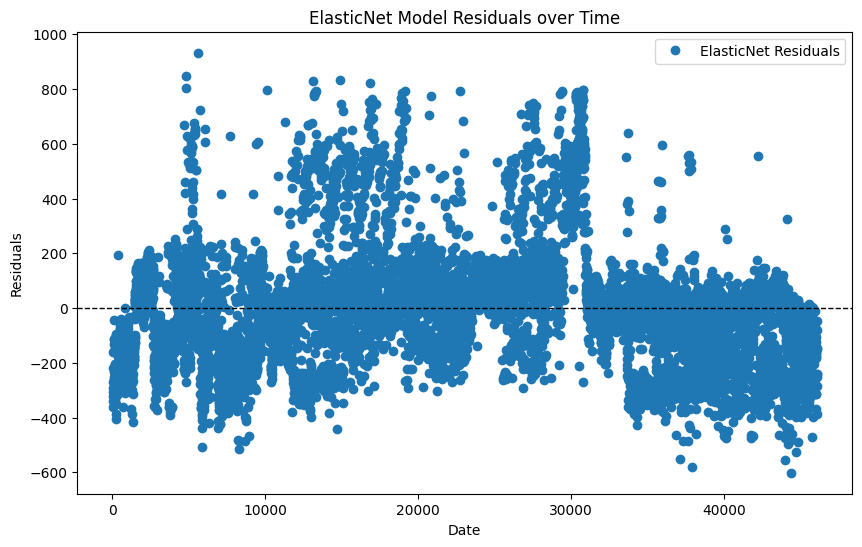

In [24]:
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5) 

elasticnet_model.fit(X_train, y_train)

y_pred_elasticnet = elasticnet_model.predict(X_test)

mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)
# Print the errors
print(f'Mean Absolute Error (ElasticNet): {mae_elasticnet}')
print(f'Mean Squared Error (ElasticNet): {mse_elasticnet}')
print(f'Root Mean Squared Error (ElasticNet): {rmse_elasticnet}')

residuals_elasticnet = y_test - y_pred_elasticnet

plt.figure(figsize=(10, 6))
plt.plot(X_test.index, residuals_elasticnet, label='ElasticNet Residuals', marker='o', linestyle='None')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('ElasticNet Model Residuals over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [25]:
actual_values = y_test  
predicted_values_gb = gb_model.predict(X_test_gb)
predicted_values_rf = rf_model.predict(X_test_rf)
predicted_values_svr = svr_model.predict(X_test_svr)
predicted_values_elasticnet = elasticnet_model.predict(X_test)
predicted_values_linear = linear_model.predict(X_test)

results_df = pd.DataFrame(index=['MAE', 'MSE', 'R-squared'])

metrics_gb = [mean_absolute_error(y_test_gb, predicted_values_gb),
              mean_squared_error(y_test_gb, predicted_values_gb),
              r2_score(y_test_gb, predicted_values_gb)]
results_df['Gradient Boosting'] = metrics_gb

metrics_rf = [mean_absolute_error(y_test_rf, predicted_values_rf),
              mean_squared_error(y_test_rf, predicted_values_rf),
              r2_score(y_test_rf, predicted_values_rf)]
results_df['Random Forest'] = metrics_rf

metrics_svr = [mean_absolute_error(y_test_svr, predicted_values_svr),
               mean_squared_error(y_test_svr, predicted_values_svr),
               r2_score(y_test_svr, predicted_values_svr)]
results_df['SVR'] = metrics_svr

metrics_elasticnet = [mean_absolute_error(actual_values, predicted_values_elasticnet),
                      mean_squared_error(actual_values, predicted_values_elasticnet),
                      r2_score(actual_values, predicted_values_elasticnet)]
results_df['ElasticNet'] = metrics_elasticnet

metrics_linear = [mean_absolute_error(actual_values, predicted_values_linear),
                  mean_squared_error(actual_values, predicted_values_linear),
                  r2_score(actual_values, predicted_values_linear)]
results_df['Linear Regression'] = metrics_linear

print(results_df)

           Gradient Boosting  Random Forest           SVR    ElasticNet  \
MAE               108.541679      96.100095    142.496419    159.568144   
MSE             22923.847995   21956.620075  41296.540970  47609.795191   
R-squared           0.558444       0.577075      0.204552      0.102711   

           Linear Regression  
MAE               159.566869  
MSE             47600.023733  
R-squared           0.102895  
